In [168]:
%run Functions.ipynb

# PCA with EEG Data
* Can reducing dimensions of data classifcation score?

In [153]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (15.0, 10.0)
matplotlib.rcParams.update({'font.size': 15})

import mne
from mne.datasets import sample
from mne.decoding import UnsupervisedSpatialFilter
from sklearn.decomposition import PCA, FastICA
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
#for scaling data into n_sample * n_feature array
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#classifer
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import mne
from mne.decoding import (SlidingEstimator, GeneralizingEstimator,
                         cross_val_multiscore, LinearModel, get_coef, Vectorizer,CSP)


import os
import os.path as op
from os import listdir
from os.path import isfile, join

from sklearn.decomposition import PCA, FastICA

In [22]:
path = 'E:\eeg_data'

all_files = read_epoch_files(path)

Reading E:\eeg_data\Ex10_Suj10_Run1-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
294 matching events found
Created an SSP operator (subspace dimension = 1)
294 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading E:\eeg_data\Ex10_Suj10_Run2-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
286 matching events found
Created an SSP operator (subspace dimension = 1)
286 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading E:\eeg_data\Ex10_Suj10_Run3-epo.fif ...
Isotrak not found
    Read a total of 1 projection i

        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
275 matching events found
Created an SSP operator (subspace dimension = 1)
275 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading E:\eeg_data\Ex10_Suj15_Run1-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
301 matching events found
Created an SSP operator (subspace dimension = 1)
301 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading E:\eeg_data\Ex10_Suj15_Run2-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00

        0 CTF compensation matrices available
173 matching events found
Created an SSP operator (subspace dimension = 1)
173 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading E:\eeg_data\Ex10_Suj19_Run3-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
207 matching events found
Created an SSP operator (subspace dimension = 1)
207 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading E:\eeg_data\Ex10_Suj19_Run4-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
186 matching events found
Created an SSP operator (sub

302 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading E:\eeg_data\Ex10_Suj23_Run2-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
305 matching events found
Created an SSP operator (subspace dimension = 1)
305 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading E:\eeg_data\Ex10_Suj23_Run3-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
305 matching events found
Created an SSP operator (subspace dimension = 1)
305 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activa

Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
282 matching events found
Created an SSP operator (subspace dimension = 1)
282 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading E:\eeg_data\Ex10_Suj28_Run1-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
255 matching events found
Created an SSP operator (subspace dimension = 1)
255 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading E:\eeg_data\Ex10_Suj28_Run2-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) act

        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
256 matching events found
Created an SSP operator (subspace dimension = 1)
256 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading E:\eeg_data\Ex10_Suj5_Run4-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
221 matching events found
Created an SSP operator (subspace dimension = 1)
221 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading E:\eeg_data\Ex10_Suj6_Run1-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
221 matching ev

In [40]:
all_filtered_files = filter_numb_epochs(all_files, n_epochs=200)

In [66]:
#get a random epoch file
np.random.seed(42)
epochs = all_filtered_files[np.random.choice(len(all_filtered_files))]

## Use PCA on the epoch file 
* How do we choose the optimal number of components?
    1. Compute Average squared projection error (can't find any info on projection error)
    2. Total variation in data 
    3. divide total variation in data by average squared projection error.
        * If value is less than a threshold (usually 0.01) then it is a good fit.
    4. This process is referred to as % of variance retained. 

In [172]:
hype_kwargs = dict(penalty = 'l2')
clf = pipeline(classifier='LogisticRegression', hype_kwargs=hype_kwargs)

<class 'sklearn.linear_model.logistic.LogisticRegression'>


In [206]:
clf = make_pipeline(Vectorizer(),
                    StandardScaler(),
                    LogisticRegression())

In [195]:
epochs = filter_events(epochs, [4,5])
X = epochs.get_data()
y = epochs.events[:,-1]
pca  =  UnsupervisedSpatialFilter(PCA(),  average=False)

pca_data = pca.fit_transform(X)

In [192]:
pca.estimator.

(127L, 61L, 1401L)

In [181]:
X.shape

(127L, 61L, 1401L)

In [183]:
X_train, X_test, y_train, y_test = train_test_split(pca_data,y, test_size = 0.3, random_state = 42)

clf.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('vectorizer', <mne.decoding.transformer.Vectorizer object at 0x000000003DC4E320>), ('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [184]:
clf.score(X_test,y_test)

0.79487179487179482

In [198]:
variance = np.cumsum(pca.estimator.explained_variance_ratio_)

In [205]:
# get the first index that has retains 99% of variance 
n_components = np.argwhere(variance > .99)[0]

epochs = filter_events(epochs, [4,5])
X = epochs.get_data()
y = epochs.events[:,-1]
pca  =  UnsupervisedSpatialFilter(PCA(n_components.ravel()),  average=False)

pca_data = pca.fit_transform(X)

In [207]:
X_train, X_test, y_train, y_test = train_test_split(pca_data,y, test_size = 0.3, random_state = 42)

clf.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('vectorizer', <mne.decoding.transformer.Vectorizer object at 0x000000006F21B2E8>), ('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [209]:

clf.score(X_test, y_test)

0.71794871794871795

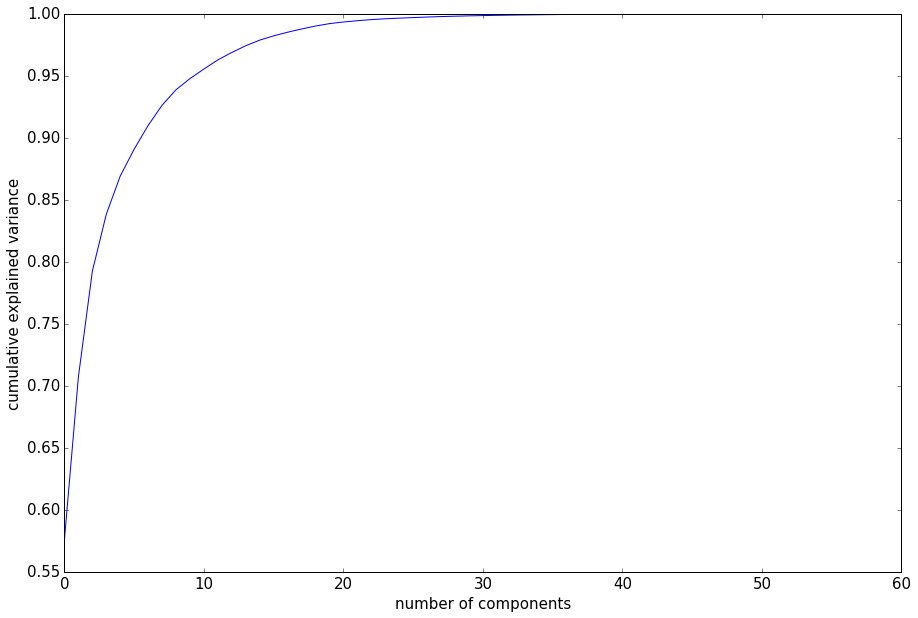

In [196]:
# vectorizer = Vectorizer()
# data = vectorizer.fit_transform(X)
# pca = PCA().fit(data)
plt.plot(np.cumsum(pca.estimator.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [138]:
epochs = filter_events(epochs, [4,5])
X = epochs.get_data()
y = epochs.events[:,-1]
pca  =  UnsupervisedSpatialFilter(PCA(5),  average=False)

pca_data = pca.fit_transform(X)

# score, clf, X_test, y_test = classify_test(pca_data,y)
print("score", score)
pred = clf.predict(X_test) 

('score', 0.79487179487179482)


In [144]:
# print(pred)
# print(y_test)
mse = mean_squared_error(y_test, pred)
var = np.var(X)

In [148]:
print("mse", mse)
print("var", var)
/var

('mse', 0.20512820512820512)
('var', 2.5634136739112551e-10)


8002149.9150084751

In [96]:
#regular score
score = classify_test(X,y)
print("Score: ", score)

('Score: ', 0.71794871794871795)


In [118]:
pca_score = classify_test(pca_data,y)
print("PCA Score: ", pca_score)

('PCA Score: ', 0.79487179487179482)


In [123]:
ev = mne.EvokedArray(np.mean(pca_data, axis=0),
                     mne.create_info(5, epochs.info['sfreq'],
                                     ch_types='eeg'))

# ev.plot(show=False, window_title="PCA");

In [87]:

pca_data.shape

(263L, 30L, 1401L)

In [86]:
epochs.get_data().shape

(263L, 61L, 1401L)

In [119]:
# epochs.plot(n_channels = 61);

In [55]:
epochs = filter_events(epochs, [4,5])

127 matching events found
Created an SSP operator (subspace dimension = 1)
0 bad epochs dropped


In [65]:
len(epochs[epochs.events[:,-1] == 5])/float(len(epochs.events[:,-1]))
# 47 percent is ok

0.47244094488188976